In [1]:
# SETTINGS

number_topics = 15

# Filter

Here we assume that the source file already contains the text, as it's a subcorpus.

In [2]:
# Filter the input file
import pandas as pd

df = pd.read_csv('00 source data (urls).csv')
df.fillna('', inplace=True)

# /!\ FILTERING
df = df[df['area'] == 'faroe islands']

df.to_csv("01 data filtered.csv", index = False, encoding='utf-8')

df

,result #,search engine,discourse,area,domain,actor name,article title,article url,article description,total nr of results (best guess),...,canonical_url,title,description,raw_content,comments,author,categories,tags,date,sitename
811,1531,bing,environment,faroe islands,drhyman,,THE IMPACT OF MERCURY ON HUMAN HEALTH AND THE …,https://drhyman.com/downloads/Impact-of-Hg.pdf,the Seychelles and Faroe islands. He presented...,345,...,,,,,,,,,,
812,1506,bing,environment,faroe islands,oceaneering,,Environmental | Sustainability - Oceaneering,https://www.oceaneering.com/sustainability/env...,ISO 14001 Environmental Management System (EMS...,345,...,,,,,,,,,,
817,1505,bing,environment,faroe islands,earthday,,How Our Trash Impacts the Environment | Earth Day,https://www.earthday.org/how-our-trash-impacts...,(Find out more about plastic pollution and how...,345,...,https://www.earthday.org/how-our-trash-impacts...,How Our Trash Impacts the Environment | Earth Day,By Austin Downs and Richard Acevedo The waste ...,Uncategorized\nHow Our Trash Impacts the Envir...,,Earth Day Network,,,2019-02-28,Earth Day
819,1504,bing,environment,faroe islands,cowi,,Environment - COWI,https://www.cowi.com/solutions/environment,"Urbanization, climate change and increasing en...",345,...,https://www.cowi.com/solutions/environment,Environment,Explore a range of COWI's environmental soluti...,"Urbanization, climate change and increasing en...",,,,Environment|health and safety|Environmental im...,,COWI
822,1508,bing,environment,faroe islands,sheilds,,NEBOSH Certificate in Environmental Management...,https://www.sheilds.org/nebosh-environmental-c...,The NEBOSH Certificate in Environmental Manage...,345,...,https://www.sheilds.org/nebosh-environmental-c...,NEBOSH Certificate in Environmental Management...,E-learning NEBOSH course Certificate Environme...,NEBOSH Exam Calendar\nStudents may choose to s...,Subscribe To Newsletter\nJoin our mailing list...,,,NEBOSH Environmental Certificate|Certificate i...,2015-10-28,SHEilds Health & Safety Training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,1868,bing,green growth,faroe islands,nasdaq,,Tony Martens: Plant-Based Solutions for Sustai...,https://www.nasdaq.com/articles/tony-martens%3...,"11/6/2020 · Tony: Well, working in commodity t...",303,...,,,,,,,,,,
1467,1925,bing,sustainability,faroe islands,kingspan,,Our Approach to Sustainability | Kingspan | Group,https://www.kingspan.com/group/about/sustainab...,We have a long-term commitment to sustainabili...,1810000,...,https://www.kingspan.com/group/about/sustainab...,SUSTAINABILITY,By being a sustainable business and by develop...,Interested in further information on our susta...,,,,sustainable insulation|sustainable building ma...,,Kingspan | Group
1640,1514,bing,environment,faroe islands,3m,,"Environmental Monitoring: Food Safety, Food Sa...",https://www.3m.com/3M/en_US/food-safety-us/res...,Effective environmental monitoring programs ca...,345,...,,,,,,,,,,
1762,1655,bing,UN SDGs,faroe islands,tesla,,Electric Vehicle & Solar Incentives | Tesla,https://www.tesla.com/support/incentives,Several states and local utilities offer elect...,248000,...,,,,,,,,,,


# Group content by actor

In [3]:
actor_dict = {}
for index, row in df.iterrows():
    if row['actor name']:
        actor_id = row['actor name']
    else:
        actor_id = row['domain']
    if actor_id in actor_dict:
        actor_obj = actor_dict[actor_id]
    else:
        actor_obj = {}
        actor_obj['Id'] = actor_id
        actor_obj['urls'] = ''
        actor_obj['text'] = ''
        actor_obj['discourse: Climate change'] = 'False'
        actor_obj['discourse: Environment'] = 'False'
        actor_obj['discourse: Green growth'] = 'False'
        actor_obj['discourse: Sustainability'] = 'False'
        actor_obj['discourse: UN SDGs'] = 'False'
        actor_obj['area: Arctic'] = 'False'
        actor_obj['area: Arctic Norway'] = 'False'
        actor_obj['area: Extended Arctic'] = 'False'
        actor_obj['area: Faroed Islands'] = 'False'
        actor_obj['area: Greenland'] = 'False'
        actor_obj['area: Iceland'] = 'False'
        actor_obj['area: Nunavut'] = 'False'
        actor_obj['area: Sami'] = 'False'
    
    actor_obj['urls'] = actor_obj['urls'] + str(row['article url']) + ' '
    actor_obj['text'] = actor_obj['text'] + str(row['raw_content']) + ' . '

    if row['discourse'] == 'Climate change':
        actor_obj['discourse: Climate change'] = 'True'
    if row['discourse'] == 'environment':
        actor_obj['discourse: Environment'] = 'True'
    if row['discourse'] == 'green growth':
        actor_obj['discourse: Green growth'] = 'True'
    if row['discourse'] == 'sustainability':
        actor_obj['discourse: Sustainability'] = 'True'
    if row['discourse'] == 'UN SDGs':
        actor_obj['discourse: UN SDGs'] = 'True'
    if row['area'] == 'arctic':
        actor_obj['area: Arctic'] = 'True'
    if row['area'] == 'arctic norway':
        actor_obj['area: Arctic Norway'] = 'True'
    if row['area'] == 'extended arctic':
        actor_obj['area: Extended Arctic'] = 'True'
    if row['area'] == 'faroe islands':
        actor_obj['area: Faroed Islands'] = 'True'
    if row['area'] == 'greenland':
        actor_obj['area: Greenland'] = 'True'
    if row['area'] == 'Iceland':
        actor_obj['area: Iceland'] = 'True'
    if row['area'] == 'Nunavut':
        actor_obj['area: Nunavut'] = 'True'
    if row['area'] == 'Sami':
        actor_obj['area: Sami'] = 'True'
    
    actor_dict[actor_id] = actor_obj
print("Actor index built.")

Actor index built.


In [4]:
# DOWNLOAD ACTORS
actors_df = pd.DataFrame.from_dict(actor_dict, orient='index')
actors_df.to_csv("02 Actors with text.csv", index = False, encoding='utf-8')
actors_df

,Id,urls,text,discourse: Climate change,discourse: Environment,discourse: Green growth,discourse: Sustainability,discourse: UN SDGs,area: Arctic,area: Arctic Norway,area: Extended Arctic,area: Faroed Islands,area: Greenland,area: Iceland,area: Nunavut,area: Sami
drhyman,drhyman,https://drhyman.com/downloads/Impact-of-Hg.pdf,.,False,True,False,False,False,False,False,False,True,False,False,False,False
oceaneering,oceaneering,https://www.oceaneering.com/sustainability/env...,. .,False,True,False,True,False,False,False,False,True,False,False,False,False
earthday,earthday,https://www.earthday.org/how-our-trash-impacts...,Uncategorized\nHow Our Trash Impacts the Envir...,False,True,False,False,True,False,False,False,True,False,False,False,False
cowi,cowi,https://www.cowi.com/solutions/environment,"Urbanization, climate change and increasing en...",False,True,False,False,False,False,False,False,True,False,False,False,False
sheilds,sheilds,https://www.sheilds.org/nebosh-environmental-c...,NEBOSH Exam Calendar\nStudents may choose to s...,False,True,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dhl,dhl,https://www.dhl.com/en.html,.,True,False,False,False,False,False,False,False,True,False,False,False,False
kingspan,kingspan,https://www.kingspan.com/gb/en-gb/products/ins...,. IKON Global Innovation Centre\nIKON is our ...,True,False,False,True,False,False,False,False,True,False,False,False,False
nasdaq,nasdaq,https://www.nasdaq.com/articles/tony-martens%3...,.,False,False,True,False,False,False,False,False,True,False,False,False,False
3m,3m,https://www.3m.com/3M/en_US/food-safety-us/res...,.,False,True,False,False,False,False,False,False,True,False,False,False,False


# LDA: extract topics

In [5]:
import pandas as pd
# This is for text mining
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
# Source file (CSV)
source_file = "02 Actors with text.csv"
text_col_name = "text"

# More features is more dimensions for each document. You should probably keep it at 1000.
no_features = 1000

In [7]:
# LOAD DATA
documents_dictionary = {}
df = pd.read_csv(source_file)

for index, row in df.iterrows():
    key = row['Id']
    text = str(row[text_col_name])
    if len(text)>10:
        documents_dictionary[key] = text

In [8]:
# COMPUTE LDA TOPICS
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents_dictionary.values())
tf_feature_names = tf_vectorizer.get_feature_names()
lda = LatentDirichletAllocation(n_components=number_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
print("LDA topics computed.")

LDA topics computed.


In [9]:
# DISPLAY RESULTS (for monitoring)
no_top_words = 25 # How many words to keep for each topic (there may be many)

# Create a data frame for convenience (for download, actually)
topics_df = pd.DataFrame(columns=['topic','word','weight'])

# Display topics to check it works. For each topic, we only display the top words.
i = 0
for topic_idx, topic in enumerate(lda.components_):
    print("# TOPIC_%d:" % (topic_idx))
    for j in topic.argsort()[:-no_top_words - 1:-1]:
        print(str(topic[j]) + "   " + tf_feature_names[j])
        topics_df.loc[i] = ["TOPIC_"+str(topic_idx), tf_feature_names[j], topic[j]]
        i = i+1
    print(" ")

topics_df

# TOPIC_0:
12.568448189822957   salesforce
8.055443968353577   cloud
6.761735764953525   data
4.745157779814017   com
3.1843892515559777   based
2.7405266821732406   climate
2.5480738251845256   time
2.498088879608082   environmental
2.4574426858195677   carbon
2.4337701241579426   view
2.389737733063136   action
2.2742633691394287   source
2.216361392124054   water
2.196911482149437   platform
2.15585519162864   security
2.1549065127887665   activities
2.1428152452748384   events
2.139327584329612   equipment
2.1213322886898474   company
2.082335931387297   access
2.079757328739365   emissions
2.074854039804307   online
2.0537743563501216   drive
2.032249074388246   service
1.9992214599711735   period
 
# TOPIC_1:
324.9129632128097   sustainability
162.10190980061395   sustainable
147.17439662955667   environmental
110.02951409307414   business
106.94637688640096   project
103.5728172623092   use
102.56467532154005   climate
97.30244682885969   impact
93.40896721774342   energy
91.426

153.95447464577794   populations
144.31549364530758   aquaculture
143.47306012344131   sea
141.08393435918208   2013
127.53622076105914   2012
126.31418430726247   marine
124.35306932681914   assessment
111.85159781377726   farms
107.67067120318386   impact
104.62331595782864   2010
 


,topic,word,weight
0,TOPIC_0,salesforce,12.568448
1,TOPIC_0,cloud,8.055444
2,TOPIC_0,data,6.761736
3,TOPIC_0,com,4.745158
4,TOPIC_0,based,3.184389
...,...,...,...
370,TOPIC_14,marine,126.314184
371,TOPIC_14,assessment,124.353069
372,TOPIC_14,farms,111.851598
373,TOPIC_14,impact,107.670671


In [10]:
# COMPUTE DOC x TOPIC RELATIONS (network)
# We create a data frame to store the content. It looks like a matrix.
df_matrix_style = pd.DataFrame(columns=['doc']+[("TOPIC_"+str(i)) for i in range(0,number_topics)])

# We create a second data frame with the same data. It looks like a list.
# Depending on what you want to do, one or the other are most convenient.
df_list_style = pd.DataFrame(columns=['doc', 'topic', 'weight'])

doc_topic = lda.transform(tf)
docs = list(documents_dictionary.keys())
topic_index = {}
i1 = 0
i2 = 0
for j in range(len(docs)):
    key = docs[j]
    topic_weights = list(doc_topic[j])
    
    # Index
    topic_index[key] = topic_weights
    
    # Matrix style
    df_matrix_style.loc[i1] = [key]+topic_weights
    i1 = i1+1
    
    # List style
    for k, w in enumerate(topic_weights):
        df_list_style.loc[i2] = [key, "TOPIC_"+str(k), w]
        i2 = i2+1

print("Done.")

Done.


In [11]:
# Output articles & topics, matrix style, to check that it works:
df_matrix_style

,doc,TOPIC_0,TOPIC_1,TOPIC_2,TOPIC_3,TOPIC_4,TOPIC_5,TOPIC_6,TOPIC_7,TOPIC_8,TOPIC_9,TOPIC_10,TOPIC_11,TOPIC_12,TOPIC_13,TOPIC_14
0,earthday,0.000370,0.615674,0.000370,0.000370,0.000370,0.117911,0.000370,0.000370,0.000370,0.218054,0.000370,0.000370,0.000370,0.000370,0.044287
1,cowi,0.001754,0.975439,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754
2,sheilds,0.000316,0.537815,0.000316,0.000316,0.000316,0.000316,0.000316,0.000316,0.000316,0.000316,0.458078,0.000316,0.000316,0.000316,0.000316
3,norden,0.001587,0.040063,0.001587,0.001587,0.001587,0.001587,0.001587,0.001587,0.120178,0.001587,0.820711,0.001587,0.001587,0.001587,0.001587
4,sensirion,0.000109,0.563408,0.000109,0.000109,0.000109,0.065484,0.000109,0.000109,0.000109,0.330826,0.000109,0.000109,0.000109,0.000109,0.039079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,etsy,0.005128,0.844121,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.089212,0.005128
150,denmark,0.001709,0.976068,0.001709,0.001709,0.001709,0.001709,0.001709,0.001709,0.001709,0.001709,0.001709,0.001709,0.001709,0.001709,0.001709
151,annabel-langbein,0.000108,0.998485,0.000108,0.000108,0.000108,0.000108,0.000108,0.000108,0.000108,0.000108,0.000108,0.000108,0.000108,0.000108,0.000108
152,oup,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.999900


In [12]:
# Output articles & topics, list style, to check that it works:
df_list_style

,doc,topic,weight
0,earthday,TOPIC_0,0.000370
1,earthday,TOPIC_1,0.615674
2,earthday,TOPIC_2,0.000370
3,earthday,TOPIC_3,0.000370
4,earthday,TOPIC_4,0.000370
...,...,...,...
2305,kingspan,TOPIC_10,0.000709
2306,kingspan,TOPIC_11,0.000709
2307,kingspan,TOPIC_12,0.000709
2308,kingspan,TOPIC_13,0.000709


In [13]:
# DOWNLOAD LDA results
# Note: these files can be used in Tableau or Table2Net to build various visualizations.

topics_df.to_csv("03-a LDA topics and their words.csv", index = False, encoding='utf-8')
# df_matrix_style.to_csv("03-? LDA actors and topics matrix.csv", index = False, encoding='utf-8')
df_list_style.to_csv("03-b LDA actors and topics list style.csv", index = False, encoding='utf-8')

In [14]:
# ENRICH FILE (and monitor new version)
for topic_id, topic in enumerate(lda.components_):
    colname = "topic_"+str(topic_id)
    values = []
    for index, row in df.iterrows():
        key = row['Id']
        if key in topic_index:
            val = topic_index[key][topic_id]
        else:
            val = 0
        values.append(val)
    df.insert(len(df.columns), colname, values)
df

,Id,urls,text,discourse: Climate change,discourse: Environment,discourse: Green growth,discourse: Sustainability,discourse: UN SDGs,area: Arctic,area: Arctic Norway,...,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,drhyman,https://drhyman.com/downloads/Impact-of-Hg.pdf,.,False,True,False,False,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,oceaneering,https://www.oceaneering.com/sustainability/env...,. .,False,True,False,True,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,earthday,https://www.earthday.org/how-our-trash-impacts...,Uncategorized\nHow Our Trash Impacts the Envir...,False,True,False,False,True,False,False,...,0.117911,0.000370,0.000370,0.000370,0.218054,0.000370,0.000370,0.000370,0.000370,0.044287
3,cowi,https://www.cowi.com/solutions/environment,"Urbanization, climate change and increasing en...",False,True,False,False,False,False,False,...,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754
4,sheilds,https://www.sheilds.org/nebosh-environmental-c...,NEBOSH Exam Calendar\nStudents may choose to s...,False,True,False,False,False,False,False,...,0.000316,0.000316,0.000316,0.000316,0.000316,0.458078,0.000316,0.000316,0.000316,0.000316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,dhl,https://www.dhl.com/en.html,.,True,False,False,False,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
169,kingspan,https://www.kingspan.com/gb/en-gb/products/ins...,. IKON Global Innovation Centre\nIKON is our ...,True,False,False,True,False,False,False,...,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709
170,nasdaq,https://www.nasdaq.com/articles/tony-martens%3...,.,False,False,True,False,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
171,3m,https://www.3m.com/3M/en_US/food-safety-us/res...,.,False,True,False,False,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
# DOWNLOAD ENRICHED FILE
df.drop(columns=[text_col_name]).to_csv("04 Actors and their topics.csv", index=False)

# Export LDA networks

In [16]:
# Export network of words and topics
import networkx as nx
G = nx.Graph()
for index, row in topics_df.iterrows():
    topic = 'T_'+str(row['topic'])
    word = 'W_'+str(row['word'])
    w = row['weight']
    
    G.add_edge(topic, word)
    G[topic][word]['weight'] = w
    
    G.nodes[topic]['label'] = str(row['topic'])
    G.nodes[topic]['type'] = 'topic'
    G.nodes[word]['label'] = str(row['word'])
    G.nodes[word]['type'] = 'word'
    
nx.write_gexf(G, "05 Words and topics.gexf")

In [17]:
# Export network of actors and topics
import networkx as nx
threshold = 0.001
G = nx.Graph()
for index, row in df_list_style.iterrows():
    topic = 'T_'+str(row['topic'])
    actor = 'A_'+str(row['doc'])
    w = row['weight']
    
    if w > threshold:
        G.add_edge(topic, actor)
        G[topic][actor]['weight'] = w

        G.nodes[topic]['label'] = str(row['topic'])
        G.nodes[topic]['type'] = 'topic'
        G.nodes[actor]['label'] = str(row['doc'])
        G.nodes[actor]['type'] = 'actor'
    
nx.write_gexf(G, "06 Actors and topics.gexf")

# UMAP after the topics

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import umap

In [19]:
# Load data
df = pd.read_csv("04 Actors and their topics.csv")
df = df.dropna()

In [20]:
# Prepare data
reducer = umap.UMAP()
umap_data = df[
    [
        "topic_0",
        "topic_1",
        "topic_2",
        "topic_3",
        "topic_4",
        "topic_5",
        "topic_6",
        "topic_7",
        "topic_8",
        "topic_9",
        "topic_10",
        "topic_11",
        "topic_12",
        "topic_13",
        "topic_14"
    ]
].values
scaled_umap_data = StandardScaler().fit_transform(umap_data)

In [21]:
# Compute embedding
embedding = reducer.fit_transform(scaled_umap_data)
embedding.shape

(173, 2)

Text(0.5, 1.0, 'UMAP projection of the dataset')

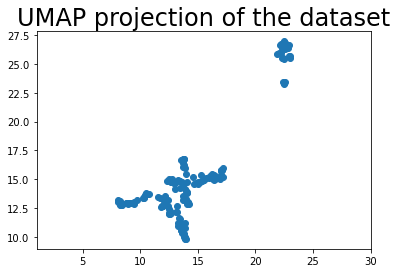

In [22]:
# Monitor embedding
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

In [23]:
# Enrich source and download
xvalues = []
yvalues = []
for index, row in df.iterrows():
    coord = embedding[index]
    xvalues.append(coord[0])
    yvalues.append(coord[1])
df.insert(len(df.columns), 'X-UMAP', xvalues)
df.insert(len(df.columns), 'Y-UMAP', yvalues)

df.to_csv("07 Actors with topics + UMAP layout.csv", index = False, encoding='utf-8')